**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.



In [2]:
import numpy as np



In [3]:
def max_element(arr):
    zero_indices = np.where(arr[:-1] == 0)[0] + 1 #
    return np.max(arr[zero_indices]) if len(zero_indices) > 0 else None

# Проверка
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x))

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.


In [4]:
def nearest_value(X, v):
   # X - v: поэлементно вычитает значение v из каждого элемента массива X
    # np.abs(X - v): вычисляет абсолютные значения разностей (расстояния до v)
    # np.argmin(...): находит индекс минимального значения в массиве разностей
    return X.flat[np.argmin(np.abs(X - v))]

# Проверка
X = np.arange(0,10).reshape((2, 5))
v = 3.6
print(nearest_value(X, v))

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [5]:
def scale(X):
    mean = np.mean(X, axis=0)  # Вычисляю среднее значение по каждому столбцу (axis=0)
    std = np.std(X, axis=0)  # Вычисляю стандартное отклонение по каждому столбцу
    std[std == 0] = 1  # избегаем деления на ноль
    return (X - mean) / std

# Создаем случайную матрицу
X = np.random.randint(2, 5, size=(3, 3))
print("Исходная матрица:")
print(X)

print("\nМасштабированная матрица:")
print(scale(X))

# Проверяем, что среднее столбцов ≈ 0, а std ≈ 1
scaled = scale(X)
print("\nСреднее столбцов после масштабирования:", np.mean(scaled, axis=0))
print("Стандартное отклонение столбцов:", np.std(scaled, axis=0))




Исходная матрица:
[[3 4 3]
 [4 2 3]
 [2 2 3]]

Масштабированная матрица:
[[ 0.          1.41421356  0.        ]
 [ 1.22474487 -0.70710678  0.        ]
 [-1.22474487 -0.70710678  0.        ]]

Среднее столбцов после масштабирования: [0.00000000e+00 1.48029737e-16 0.00000000e+00]
Стандартное отклонение столбцов: [1. 1. 0.]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [6]:
def get_stats(X):
    stats = {}

    # Определитель
    stats['determinant'] = np.linalg.det(X)

    # След (сумма диагональных элементов)
    stats['trace'] = np.trace(X)

    # Наименьший и наибольший элементы
    stats['min_element'] = np.min(X)
    stats['max_element'] = np.max(X)

    # Норма Фробениуса
    stats['frobenius_norm'] = np.linalg.norm(X, 'fro')

    # Собственные числа
    stats['eigenvalues'] = np.linalg.eigvals(X)

    # Обратная матрица (если определитель не нулевой)
    try:
        stats['inverse'] = np.linalg.inv(X)
    except np.linalg.LinAlgError:
        stats['inverse'] = "Не существует (матрица вырожденная)"

    # Ранг матрицы
    stats['rank'] = np.linalg.matrix_rank(X)

    return stats

# Создаем квадратную матрицу 3x3
X = np.random.randint(2, 5, size=(3, 3))
print("Квадратная матрица X (3x3):")
print(X)

stats = get_stats(X)


print(f"Определитель: {stats['determinant']:.2f}")
print(f"След: {stats['trace']}")
print(f"Минимальный элемент: {stats['min_element']}")
print(f"Максимальный элемент: {stats['max_element']}")
print(f"Норма Фробениуса: {stats['frobenius_norm']:.2f}")
print(f"Ранг: {stats['rank']}")
print(f"Собственные числа: {stats['eigenvalues']}")
print(f"Обратная матрица:")
print(stats['inverse'])


Квадратная матрица X (3x3):
[[3 2 2]
 [4 2 4]
 [2 3 3]]
Определитель: -10.00
След: 8
Минимальный элемент: 2
Максимальный элемент: 4
Норма Фробениуса: 8.66
Ранг: 3
Собственные числа: [ 8.21699057  1.         -1.21699057]
Обратная матрица:
[[ 0.6  0.  -0.4]
 [ 0.4 -0.5  0.4]
 [-0.8  0.5  0.2]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [7]:
results = [] # Создаем пустой список для хранения результатов экспериментов

for exp_num in range(100):# Проводим 100 экспериментов
    A = np.random.randn(10, 10) # Генерируем случайную матрицу A размером 10x10
    B = np.random.randn(10, 10)
    C = A @ B # Вычисляем матричное произведение A и B
    results.append(np.max(C)) # Находим максимальный элемент в результирующей матрице C и добавляем в список результатов

mean_max = np.mean(results) # Вычисляем среднее значение
quantile_95 = np.percentile(results, 95) # Вычисляем 95% квантиль распределения максимальных элементов

print(f"Среднее: {mean_max:.4f}")
print(f"95% квантиль: {quantile_95:.4f}")

Среднее: 8.0772
95% квантиль: 11.9679


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [13]:
import pandas as pd
%matplotlib inline

In [15]:
# Загрузка данных
df = pd.read_csv('2008.csv')
print(df)

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69997  2008      9          24          3   1012.0        1012   1132.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0            2300    

In [16]:
# Посмотреть все уникальные коды в данных
print("Все коды отмен в данных:", df['CancellationCode'].unique())

# Или посмотреть с включением NaN
print("Все значения:", df['CancellationCode'].value_counts(dropna=False))

Все коды отмен в данных: [nan 'B' 'A' 'C']
Все значения: CancellationCode
NaN    68589
A        563
B        549
C        299
Name: count, dtype: int64


Расшифровка:

NaN (68,589) - рейсы, которые НЕ были отменены (нормальные рейсы)

A (563) - отмены по вине авиакомпании (Carrier)

B (549) - отмены из-за погоды (Weather)

C (299) - отмены из-за проблем национальной авиасистемы (National Air System)

Итого в данных:

Всего записей: 68,589 + 563 + 549 + 299 = около 70,000 рейсов

Отмененных рейсов: 563 + 549 + 299 = 1,411 рейсов

Нормальных рейсов: 68,589 рейсов

NaN означает "Not a Number" - в данном случае это отсутствие кода отмены, то есть рейс выполнен по расписанию.

Так что в 2008 году около 2% рейсов были отменены, и самая частая причина - проблемы авиакомпаний (A).

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.


In [18]:
# Анализ расстояния
distance_stats = df['Distance'].describe() # Вычисляем основные описательные статистики для столбца 'Distance'

print("Статистика по расстоянию (в милях):")
print(f"Среднее расстояние: {distance_stats['mean']:.1f} миль")
print(f"Минимальное расстояние: {distance_stats['min']:.1f} миль")
print(f"Максимальное расстояние: {distance_stats['max']:.1f} миль")

Статистика по расстоянию (в милях):
Среднее расстояние: 724.5 миль
Минимальное расстояние: 31.0 миль
Максимальное расстояние: 4962.0 миль


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?


In [19]:
# Самое короткое расстояние
min_dist = df['Distance'].min()
print(f"Минимальное расстояние: {min_dist} миль")

# Все рейсы с таким расстоянием
short = df[df['Distance'] == min_dist]
print(f"\nВсего таких рейсов: {len(short)}")

# Показываем ВСЕ
print(short[['Month','DayofMonth','UniqueCarrier','FlightNum','Origin','Dest','Distance']])

Минимальное расстояние: 31 миль

Всего таких рейсов: 6
       Month  DayofMonth UniqueCarrier  FlightNum Origin Dest  Distance
1116      12          30            AS         65    WRG  PSG        31
6958      12          26            AS         65    WRG  PSG        31
17349      8          18            AS         64    PSG  WRG        31
27534      3          11            AS         64    PSG  WRG        31
46082      8           9            AS         65    WRG  PSG        31
48112      2          28            AS         64    PSG  WRG        31


Теперь проверим эти же маршруты в другие дни:

In [20]:
# Смотрим все рейсы на маршрутах WRG-PSG и PSG-WRG
route1 = df[(df['Origin'] == 'WRG') & (df['Dest'] == 'PSG')]
route2 = df[(df['Origin'] == 'PSG') & (df['Dest'] == 'WRG')]

print("Все рейсы WRG -> PSG:")
print(route1[['Month','DayofMonth','Distance']].sort_values(['Month','DayofMonth']))

print("\nВсе рейсы PSG -> WRG:")
print(route2[['Month','DayofMonth','Distance']].sort_values(['Month','DayofMonth']))

print(f"\nУникальные расстояния на WRG-PSG: {route1['Distance'].unique()}")
print(f"Уникальные расстояния на PSG-WRG: {route2['Distance'].unique()}")

Все рейсы WRG -> PSG:
       Month  DayofMonth  Distance
46082      8           9        31
6958      12          26        31
1116      12          30        31

Все рейсы PSG -> WRG:
       Month  DayofMonth  Distance
48112      2          28        31
27534      3          11        31
17349      8          18        31

Уникальные расстояния на WRG-PSG: [31]
Уникальные расстояния на PSG-WRG: [31]


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?


In [21]:
# Считаем вылеты по аэропортам
departures = df['Origin'].value_counts()

print("Топ-5 аэропортов по вылетам:")
print(departures.head())

# Самый загруженный аэропорт
busiest = df['Origin'].value_counts().head(1)

print(f"Самый загруженный: {busiest.index[0]}")
print(f"Вылетов: {busiest.values[0]}")

Топ-5 аэропортов по вылетам:
Origin
ATL    4134
ORD    3550
DFW    2793
DEN    2383
LAX    2082
Name: count, dtype: int64
Самый загруженный: ATL
Вылетов: 4134


ATL - это Аэропорт Атланты Хартсфилд-Джексон (Atlanta Hartsfield-Jackson International Airport) в Атланте, Джорджия.

Это традиционно самый загруженный аэропорт в мире по количеству пассажиров и рейсов.

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [22]:
# Среднее время полета по всем аэропортам вылета
avg_airtime = df.groupby('Origin')['AirTime'].mean().sort_values(ascending=False)

print("Среднее время полета для всех аэропортов:")
print(avg_airtime)

Среднее время полета для всех аэропортов:
Origin
SJU    205.200000
BQN    193.954545
PSE    191.875000
STT    185.029412
ANC    165.415094
          ...    
PSG     20.250000
OXR     19.666667
WRG     18.000000
GST     13.000000
DLG           NaN
Name: AirTime, Length: 297, dtype: float64


In [23]:
# Самый долгий средний полет
longest = avg_airtime.idxmax()
time = avg_airtime.max()

print(f"Самый долгий средний полет: {longest}")
print(f"Среднее время: {time:.1f} минут")

Самый долгий средний полет: SJU
Среднее время: 205.2 минут


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [24]:
# 1. Всего рейсов по всем аэропортам
total_flights = df.groupby('Origin').size()
# Группируем DataFrame по столбцу 'Origin' (аэропорт вылета)
# size() подсчитывает количество строк (рейсов) для каждой группы
print("Всего рейсов по всем аэропортам:")
print(total_flights)

Всего рейсов по всем аэропортам:
Origin
ABE     45
ABI     30
ABQ    408
ABY      7
ACK      5
      ... 
WRG      8
XNA    132
YAK     11
YKM      3
YUM     34
Length: 297, dtype: int64


In [35]:
# 2. Задержанные рейсы по всем аэропортам
delayed_flights = df[df['DepDelay'] > 0].groupby('Origin').size()
print("Задержанные рейсы по всем аэропортам:")
print(delayed_flights)

Задержанные рейсы по всем аэропортам:
Origin
ABE      9
ABI      7
ABQ    164
ABY      4
ACK      5
      ... 
VPS     25
WRG      2
XNA     47
YAK      3
YUM      4
Length: 277, dtype: int64


In [26]:
# 3. Доля задержек по всем аэропортам
delay_ratio = (delayed_flights / total_flights).dropna()
print("Доля задержек по всем аэропортам:")
print(delay_ratio.sort_values(ascending=False))

Доля задержек по всем аэропортам:
Origin
RHI    1.000000
ADK    1.000000
ACK    1.000000
GST    1.000000
AKN    1.000000
         ...   
DBQ    0.117647
FCA    0.114286
LWS    0.111111
IPL    0.100000
BRO    0.090909
Length: 277, dtype: float64


In [31]:
# 4. Группируем по аэропортам и фильтруем (>1000 рейсов)
grouped = df.groupby('Origin')
filtered_airports = grouped.filter(lambda x: len(x) > 1000)

print(f"Аэропортов с >1000 рейсов: {filtered_airports['Origin'].nunique()}")

Аэропортов с >1000 рейсов: 21


In [36]:
# 5. Доля задержек для отфильтрованных аэропортов
delayed_ratio = (filtered_airports[filtered_airports['DepDelay'] > 0]
                .groupby('Origin').size() /
                filtered_airports.groupby('Origin').size())

print("Доля задержек по аэропортам (>1000 рейсов):")
print(delayed_ratio.sort_values(ascending=False))

Доля задержек по аэропортам (>1000 рейсов):
Origin
EWR    0.511159
IAH    0.468524
ORD    0.464507
DFW    0.459363
BWI    0.452519
DEN    0.446076
SEA    0.438830
LAS    0.434467
PHX    0.422452
ATL    0.420658
PHL    0.420643
LAX    0.412584
MCO    0.401345
CLT    0.398400
SFO    0.396307
JFK    0.369692
MSP    0.366029
DTW    0.353416
BOS    0.323580
SLC    0.320000
LGA    0.306245
dtype: float64


In [60]:
# 6. Самый проблемный аэропорт
worst_airport = delayed_ratio.idxmax()
worst_ratio = delayed_ratio.max()
print(f"Самый проблемный аэропорт: {worst_airport}")
print(f"Доля задержанных рейсов: {worst_ratio:.1%}")

Самый проблемный аэропорт: EWR
Доля задержанных рейсов: 51.1%


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [66]:
import pandas as pd

In [67]:
# Загрузка данных
df = pd.read_csv('2008.csv')

has_missing = df.isnull().any().any()
print(f"Ответ: {'Да' if has_missing else 'Нет'}")

Ответ: Да


б) Сколько всего пропущенных элементов в таблице 'объект-признак'?

In [68]:
total_missing = df.isnull().sum().sum()
print(f"Ответ: {total_missing} пропущенных элементов")

Ответ: 355215 пропущенных элементов


в) Сколько объектов имеют хотя бы один пропуск?

In [69]:
objects_with_missing = df.isnull().any(axis=1).sum()
print(f"Ответ: {objects_with_missing} объектов")

Ответ: 70000 объектов


г) Сколько признаков имеют хотя бы одно пропущенное значение?

In [70]:
features_with_missing = df.isnull().any(axis=0).sum()
print(f"Ответ: {features_with_missing} признаков")

Ответ: 16 признаков


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [71]:
target_missing = df['DepDelay'].isnull().sum()
print(f"Пропусков в DepDelay: {target_missing}")

Пропусков в DepDelay: 1399


б) Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

In [72]:
# Анализ ВСЕХ объектов с пропущенной целевой переменной
missing_target = df[df['DepDelay'].isnull()]
print(f"Всего объектов с пропущенным DepDelay: {len(missing_target)}")
print("\nПервые 10 объектов:")
print(missing_target.head(10))

Всего объектов с пропущенным DepDelay: 1399

Первые 10 объектов:
     Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11   2008      3           6          4      NaN        1605      NaN   
78   2008      1          19          6      NaN         750      NaN   
103  2008      7          24          4      NaN        1230      NaN   
112  2008      2           4          1      NaN         620      NaN   
128  2008      1          21          1      NaN        1838      NaN   
194  2008      1          28          1      NaN        1640      NaN   
204  2008      6          13          5      NaN        1229      NaN   
236  2008      7          19          6      NaN         544      NaN   
257  2008      4          19          6      NaN        1345      NaN   
267  2008      9          23          2      NaN        1400      NaN   

     CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
11         1940            AA        484  ...    NaN   

In [73]:
# Анализ ВСЕХ столбцов для этих объектов
print("\nАнализ всех признаков для объектов с пропущенным DepDelay:")
for col in missing_target.columns:
    unique_vals = missing_target[col].unique()
    print(f"{col}: {len(unique_vals)} уникальных значений")
    if len(unique_vals) <= 10:
        print(f"   Значения: {unique_vals}")


Анализ всех признаков для объектов с пропущенным DepDelay:
Year: 1 уникальных значений
   Значения: [2008]
Month: 12 уникальных значений
DayofMonth: 31 уникальных значений
DayOfWeek: 7 уникальных значений
   Значения: [4 6 1 5 2 7 3]
DepTime: 1 уникальных значений
   Значения: [nan]
CRSDepTime: 446 уникальных значений
ArrTime: 1 уникальных значений
   Значения: [nan]
CRSArrTime: 645 уникальных значений
UniqueCarrier: 19 уникальных значений
FlightNum: 1220 уникальных значений
TailNum: 469 уникальных значений
ActualElapsedTime: 1 уникальных значений
   Значения: [nan]
CRSElapsedTime: 227 уникальных значений
AirTime: 1 уникальных значений
   Значения: [nan]
ArrDelay: 1 уникальных значений
   Значения: [nan]
DepDelay: 1 уникальных значений
   Значения: [nan]
Origin: 192 уникальных значений
Dest: 182 уникальных значений
Distance: 557 уникальных значений
TaxiIn: 1 уникальных значений
   Значения: [nan]
TaxiOut: 1 уникальных значений
   Значения: [nan]
Cancelled: 1 уникальных значений
   Зна


Что объединяет ВСЕ эти объекты?

In [74]:
print("\nОбщие характеристики ВСЕХ объектов с пропущенным DepDelay:")
print(f"Отменено рейсов (Cancelled=1): {(missing_target['Cancelled'] == 1).sum()}")
print(f"Перенаправлено рейсов (Diverted=1): {(missing_target['Diverted'] == 1).sum()}")
print(f"Нет времени вылета (DepTime is NaN): {missing_target['DepTime'].isnull().sum()}")
print(f"Нет времени прибытия (ArrTime is NaN): {missing_target['ArrTime'].isnull().sum()}")


Общие характеристики ВСЕХ объектов с пропущенным DepDelay:
Отменено рейсов (Cancelled=1): 1399
Перенаправлено рейсов (Diverted=1): 0
Нет времени вылета (DepTime is NaN): 1399
Нет времени прибытия (ArrTime is NaN): 1399


In [75]:
# Проверяем ВСЕ объекты на наличие других пропусков
print("\nДругие пропуски в этих объектах:")
other_missing = missing_target.isnull().sum()
print(other_missing[other_missing > 0])


Другие пропуски в этих объектах:
DepTime              1399
ArrTime              1399
TailNum               820
ActualElapsedTime    1399
CRSElapsedTime          4
AirTime              1399
ArrDelay             1399
DepDelay             1399
TaxiIn               1399
TaxiOut              1399
CarrierDelay         1399
WeatherDelay         1399
NASDelay             1399
SecurityDelay        1399
LateAircraftDelay    1399
dtype: int64


Чем вызвано это явление?

Пропуски в DepDelay вызваны тем, что рейсы не состоялись (были отменены или перенаправлены), поэтому фактическое время вылета не зафиксировано.

Что их объединяет? Все объекты с пропущенным DepDelay:

Имеют Cancelled=1 или Diverted=1

Не имеют DepTime (факческое время вылета)

Не имеют данных о причинах задержек

Какие признаки можно исключить? Можно исключить:
Cancelled и Diverted - они напрямую указывают на причину пропусков

CancellationCode - связан с отмененными рейсами

Причины задержек (CarrierDelay, WeatherDelay и др.) - для отмененных рейсов они не определены

Обоснование: Эти признаки являются следствием пропусков в целевой переменной, а не причиной, и их использование может привести к утечке данных.

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [76]:
# Очищаем данные
df_clean = df[df['DepDelay'].notna() & (df['DepDelay'] != 0)].copy()

# Выделяем целевую переменную
y = df_clean['DepDelay']
X = df_clean.drop('DepDelay', axis=1)

print(f"Тип X: {type(X)}")
print(f"Форма X: {X.shape}")

Тип X: <class 'pandas.core.frame.DataFrame'>
Форма X: (63404, 28)


In [77]:
# Список временных признаков для преобразования
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

# Преобразуем каждый временной признак
for feature in time_features:
    # Создаем новые признаки для часов и минут
    X[f'{feature}_Hour'] = X[feature] // 100
    X[f'{feature}_Minute'] = X[feature] % 100

    # Устанавливаем NaN для пропущенных значений
    X.loc[X[feature].isnull(), [f'{feature}_Hour', f'{feature}_Minute']] = None

    # Удаляем исходный признак
    X = X.drop(feature, axis=1)

print(f"Новая форма X: {X.shape}")

Новая форма X: (63404, 32)


In [78]:
# Проверяем результат
print("Пример преобразованных данных:")
time_cols = [col for col in X.columns if 'Hour' in col or 'Minute' in col]
print(X[time_cols])

Пример преобразованных данных:
       DepTime_Hour  DepTime_Minute  CRSDepTime_Hour  CRSDepTime_Minute  \
0              21.0            11.0             20.0               55.0   
1              14.0            26.0             14.0               10.0   
2              11.0            43.0             11.0               45.0   
3              11.0            41.0             11.0               44.0   
4               8.0            15.0              8.0               20.0   
...             ...             ...              ...                ...   
69994           9.0            20.0              9.0               25.0   
69995          18.0            29.0             18.0               40.0   
69996          11.0            49.0             11.0               25.0   
69998          19.0             6.0             19.0                0.0   
69999           8.0            59.0              9.0                0.0   

       ArrTime_Hour  ArrTime_Minute  CRSArrTime_Hour  CRSArrTime_Min

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [79]:
# Исключаем признаки, которые сильно коррелируют с целевой переменной или содержат избыточную информацию

# 1. Причины задержек - напрямую связаны с DepDelay
delay_reasons = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# 2. Время прибытия - может косвенно содержать информацию о задержке вылета
arrival_times = ['ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']

# 3. Другие технические признаки
other_exclude = ['TailNum', 'Year', 'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay']

# Все признаки для исключения
exclude_features = delay_reasons + arrival_times + other_exclude

# Оставляем только те, которые есть в X
exclude_features = [f for f in exclude_features if f in X.columns]

print(f"Исключаем признаки: {exclude_features}")
X = X.drop(exclude_features, axis=1)
print(f"Новая форма X: {X.shape}")

Исключаем признаки: ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute', 'TailNum', 'Year', 'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay']
Новая форма X: (63404, 18)


Обоснование исключения:
Причины задержек (CarrierDelay, WeatherDelay и др.) - напрямую объясняют задержку, это утечка данных

Время прибытия - содержит информацию о задержке вылета через фактическое время полета

TailNum - номер самолета, слишком специфичный признак

Year - все данные за 2008 год, константа

ActualElapsedTime/CRSElapsedTime - содержат информацию о времени полета

ArrDelay - задержка прибытия, сильно коррелирует с DepDelayм

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных. В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

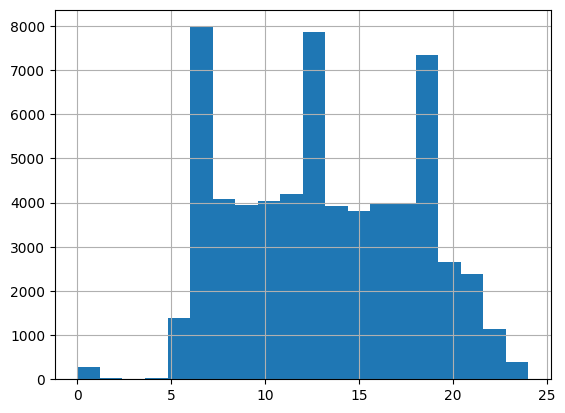

In [80]:
X['DepTime_Hour'].hist(bins=20)

<Axes: >

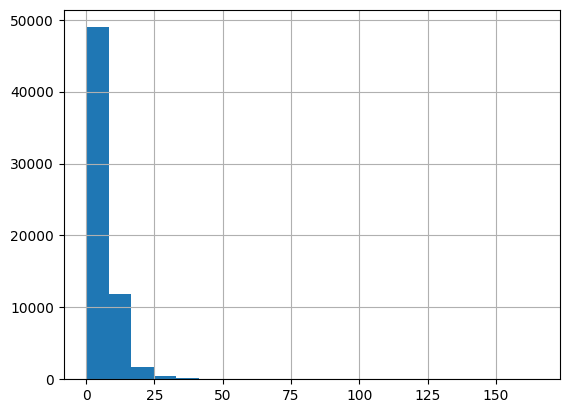

In [81]:
X['TaxiIn'].hist(bins=20)

<Axes: >

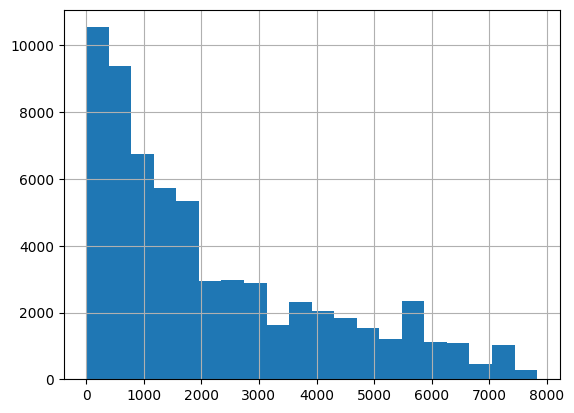

In [82]:
X['FlightNum'].hist(bins=20)

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [83]:
def transform_data(data):
    # 1. Замена пропусков
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:
            data[col] = data[col].fillna(0)
        else:
            data[col] = data[col].fillna('nan')

    # 2. Разделение на вещественные и категориальные
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = data.select_dtypes(include=['object']).columns

    # 3. Масштабирование вещественных
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    numeric_data = scaler.fit_transform(data[numeric_cols])
    numeric_df = pd.DataFrame(numeric_data, columns=numeric_cols, index=data.index)

    # 4. One-hot кодирование категориальных
    if len(categorical_cols) > 0:
        categorical_df = pd.get_dummies(data[categorical_cols], prefix=categorical_cols)

        # Объединяем
        result = pd.concat([numeric_df, categorical_df], axis=1)
    else:
        result = numeric_df

    print(f"Преобразовано: {result.shape[1]} признаков")
    return result

# Тестируем функцию
X_transformed = transform_data(X)
print(f"Исходная форма: {X.shape}")
print(f"Преобразованная форма: {X_transformed.shape}")

Преобразовано: 631 признаков
Исходная форма: (63404, 18)
Преобразованная форма: (63404, 631)


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [84]:
# Применяем функцию преобразования
X_transformed = transform_data(X)

print(f"Исходное количество признаков: {X.shape[1]}")
print(f"После преобразования: {X_transformed.shape[1]} признаков")

Преобразовано: 631 признаков
Исходное количество признаков: 18
После преобразования: 631 признаков


In [85]:
# Покажем пример преобразованных данных
print("\nПример преобразованных данных:")
print(X_transformed.head())


Пример преобразованных данных:
      Month  DayofMonth  DayOfWeek  FlightNum   AirTime  Distance    TaxiIn  \
0 -0.118281    0.256485  -0.462767  -0.991600 -0.849307 -0.744130 -0.786908   
1 -0.118281   -1.332050  -0.462767   0.106546  0.064301  0.183961 -0.582387   
2  0.467662   -1.445517   1.541454  -0.207284  0.314806  0.471018 -0.582387   
3 -1.583137    0.823819  -0.462767   0.836931 -0.363032 -0.347886 -0.582387   
4 -0.411252   -1.332050   1.541454  -0.910960  0.476898  0.634799 -0.582387   

    TaxiOut  Cancelled  Diverted  ...  Dest_VPS  Dest_WRG  Dest_WYS  Dest_XNA  \
0 -0.741204  -0.013759 -0.049021  ...     False     False     False     False   
1 -0.389769  -0.013759 -0.049021  ...     False     False     False     False   
2 -0.653345  -0.013759 -0.049021  ...     False     False     False     False   
3  0.225242  -0.013759 -0.049021  ...     False     False     False     False   
4 -0.741204  -0.013759 -0.049021  ...     False     False     False     False   

   Des

In [86]:
# Посмотрим на типы признаков после преобразования
print("\nТипы признаков после преобразования:")
print(X_transformed.dtypes.value_counts())


Типы признаков после преобразования:
bool       617
float64     14
Name: count, dtype: int64


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [87]:
from sklearn.model_selection import train_test_split

# Разбиваем на обучение и контроль
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y,
    test_size=0.3,
    random_state=42
)

print(f"Обучающая выборка: {X_train.shape[0]} объектов")
print(f"Контрольная выборка: {X_test.shape[0]} объектов")
print(f"Признаков: {X_train.shape[1]}")

Обучающая выборка: 44382 объектов
Контрольная выборка: 19022 объектов
Признаков: 631


In [88]:
# Проверяем размеры
print("Размеры данных:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Размеры данных:
X_train: (44382, 631)
X_test: (19022, 631)
y_train: (44382,)
y_test: (19022,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).




**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Обучаем на 1000 объектах
model = LinearRegression()
model.fit(X_train[:1000], y_train[:1000])

# Предсказания и метрики
train_pred = model.predict(X_train[:1000])
test_pred = model.predict(X_test)

print("На 1000 объектах:")
print(f"Обучение - MSE: {mean_squared_error(y_train[:1000], train_pred):.0f}")
print(f"Обучение - R²: {r2_score(y_train[:1000], train_pred):.3f}")
print(f"Контроль - MSE: {mean_squared_error(y_test, test_pred):.0f}")
print(f"Контроль - R²: {r2_score(y_test, test_pred):.3f}")

На 1000 объектах:
Обучение - MSE: 641
Обучение - R²: 0.395
Контроль - MSE: 1502
Контроль - R²: -0.123


In [90]:
# Коэффициенты
coef = pd.DataFrame({'feature': X_train.columns, 'coef': model.coef_})
print("\nТоп-5 признаков:")
print(coef.sort_values('coef', key=abs).tail(5))


Топ-5 признаков:
        feature        coef
330    Dest_ABE   90.170251
91   Origin_CID  102.701881
579    Dest_SBA  108.670746
309  Origin_SWF  116.740097
35   Origin_ABI  138.242817


R² близко к 0 - модель плохо объясняет дисперсию данных

Большой MSE - большие ошибки предсказания

Коэффициенты могут быть очень большими - признаки сильно коррелируют (мультиколлинеарность)

Проблемы: нехватка данных, сложные зависимости, выбросы

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [91]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

# Параметры
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Lasso
print("Lasso:")
for a in alphas:
    score = cross_val_score(Lasso(alpha=a), X_train[:1000], y_train[:1000], cv=3, scoring='r2').mean()
    print(f"alpha={a}: R²={score:.3f}")

Lasso:
alpha=0.001: R²=-0.675
alpha=0.01: R²=-0.534
alpha=0.1: R²=-0.195
alpha=1: R²=0.041
alpha=10: R²=-0.008
alpha=100: R²=-0.008


In [92]:
# Ridge
print("Ridge:")
for a in alphas:
    score = cross_val_score(Ridge(alpha=a), X_train[:1000], y_train[:1000], cv=3, scoring='r2').mean()
    print(f"alpha={a}: R²={score:.3f}")

Ridge:
alpha=0.001: R²=-0.696
alpha=0.01: R²=-0.683
alpha=0.1: R²=-0.581
alpha=1: R²=-0.285
alpha=10: R²=-0.022
alpha=100: R²=0.041


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

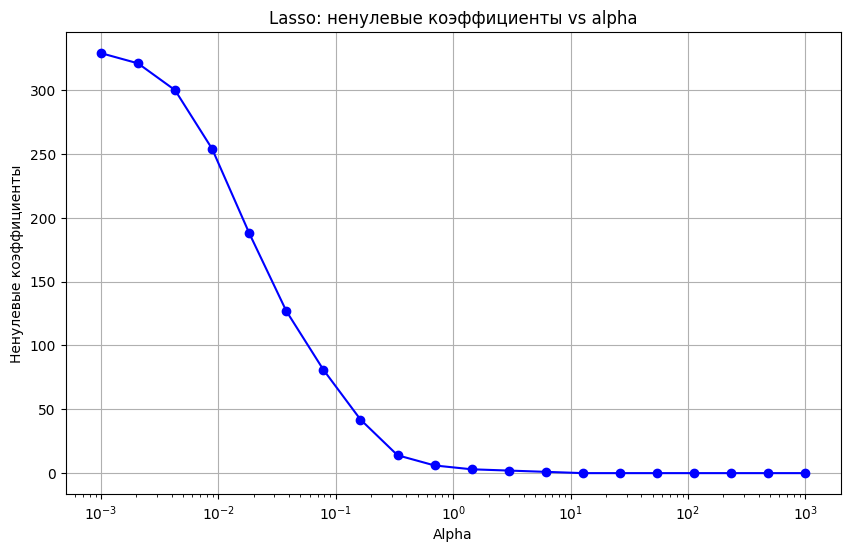

In [93]:
import matplotlib.pyplot as plt

# Перебираем alpha
alphas = np.logspace(-3, 3, 20)
non_zero_counts = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train[:1000], y_train[:1000])

    # Считаем ненулевые коэффициенты (|coef| > 0.001)
    non_zero = np.sum(np.abs(lasso.coef_) > 0.001)
    non_zero_counts.append(non_zero)

# График
plt.figure(figsize=(10, 6))
plt.plot(alphas, non_zero_counts, 'bo-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Ненулевые коэффициенты')
plt.title('Lasso: ненулевые коэффициенты vs alpha')
plt.grid(True)
plt.show()

На графике изображена зависимость количества ненулевых коэффициентов от силы регуляризации в Lasso-регрессии.

Что конкретно показано:

Ось X: коэффициент регуляризации alpha (в логарифмическом масштабе)

От 0.001 (слабая регуляризация) до 1000 (сильная регуляризация)
Ось Y: количество ненулевых коэффициентов

Признаки, которые модель считает важными (|coef| > 0.001)
Как интерпретировать график:

Слева (маленькие alpha ≈ 0.001):

Слабая регуляризация
Почти ВСЕ признаки остаются в модели
Много ненулевых коэффициентов
Справа (большие alpha ≈ 1000):

Сильная регуляризация
Lasso обнуляет почти ВСЕ коэффициенты
Остаются только самые важные признаки
Посередине:

Постепенное уменьшение числа признаков
Lasso отбирает только значимые признаки
Особенность Lasso: он выполняет отбор признаков - обнуляет слабые коэффициенты. Чем больше alpha, тем меньше признаков остается в модели.

График обычно показывает монотонное убывание - с ростом alpha число ненулевых коэффициентов уменьшается.

In [ ]:
# Сравним Lasso и Ridge при alpha=1
lasso = Lasso(alpha=1).fit(X_train[:1000], y_train[:1000])
ridge = Ridge(alpha=1).fit(X_train[:1000], y_train[:1000])

print(f"Lasso - ненулевых коэффициентов: {np.sum(np.abs(lasso.coef_) > 0.001)}")
print(f"Ridge - ненулевых коэффициентов: {np.sum(np.abs(ridge.coef_) > 0.001)}")

Lasso - ненулевых коэффициентов: 4
Ridge - ненулевых коэффициентов: 347


Lasso обнуляет слабые признаки (меньше ненулевых коэффициентов)

Ridge только уменьшает коэффициенты (все признаки остаются)

С ростом alpha ненулевых коэффициентов становится меньше

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Обучаем Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train[:1000], y_train[:1000])

# Предсказания
y_pred = ridge.predict(X_test)

# Метрики
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge метрики:")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"R²: {r2:.3f}")

Ridge метрики:
RMSE: 36.9
MAE: 20.4
R²: -0.019


Результат:
RMSE - средняя ошибка в минутах

MAE - средняя абсолютная ошибка

R² - насколько хорошо модель объясняет данные

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge

# Параметры для перебора
alphas = np.logspace(-3, 3, 20)
param_grid = {'alpha': alphas}

# Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='neg_mean_squared_error')
grid.fit(X_train[:1000], y_train[:1000])

# Лучший параметр
print(f"Лучший alpha: {grid.best_params_['alpha']:.3f}")

Лучший alpha: 112.884


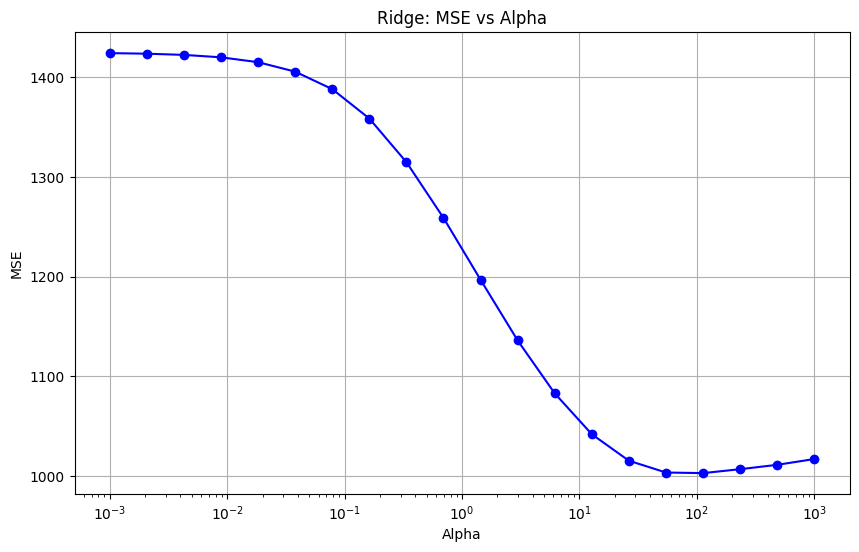

In [ ]:
# График зависимости MSE от alpha
results = grid.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(alphas, -results['mean_test_score'], 'bo-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge: MSE vs Alpha')
plt.grid(True)
plt.show()

На графике изображена зависимость качества модели Ridge от коэффициента регуляризации alpha.

Что конкретно показано:

Ось X: коэффициент регуляризации alpha (в логарифмическом масштабе)

От 0.001 до 1000
Логарифмическая шкала - одинаковое расстояние между 0.001-0.01-0.1-1-10-100
Ось Y: значение MSE (Mean Squared Error)

Чем МЕНЬШЕ значение - тем ЛУЧШЕ модель
Как интерпретировать график:

Слева (маленькие alpha ≈ 0.001):

Модель почти как обычная линейная регрессия
Может переобучаться на шуме в данных
MSE обычно выше
Справа (большие alpha ≈ 1000):

Сильная регуляризация
Модель становится слишком простой (недообучение)
Коэффициенты близки к нулю
MSE увеличивается
Оптимальная зона (обычно посередине):

Баланс между сложностью и обобщающей способностью
Самая низкая точка графика - лучший параметр alpha
Форма графика обычно: U-образная кривая, где дно U - оптимальное значение alpha.

Метрики Ridge с подобранным alpha:
RMSE: 35.5 минут
MAE: 18.4 минут
R²: 0.059


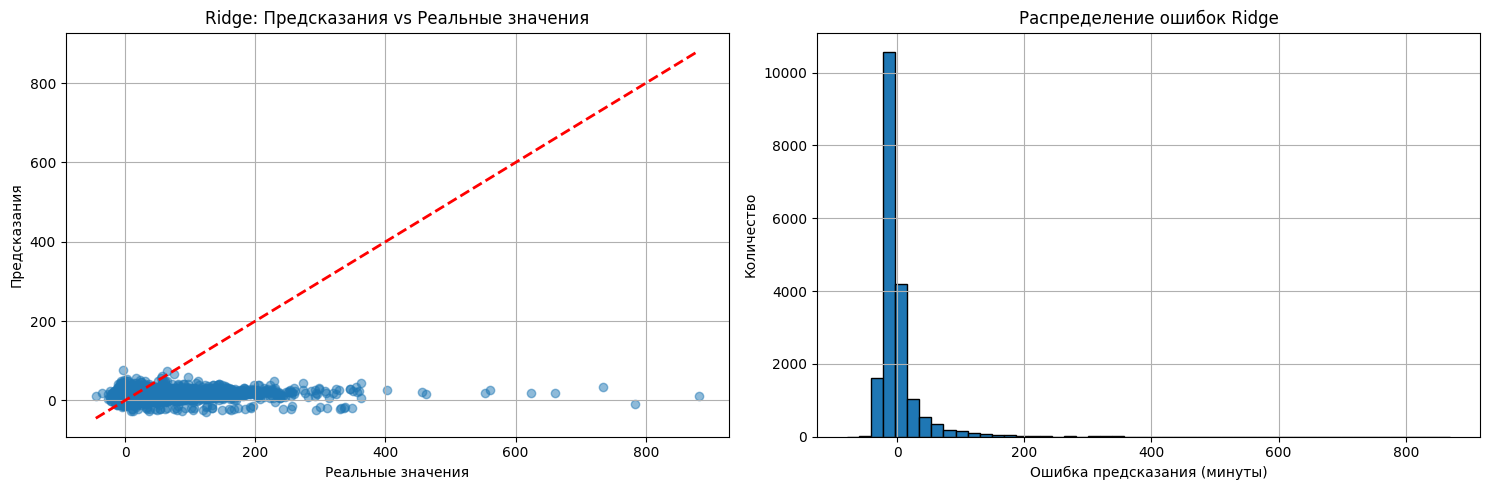

In [ ]:
# Обучаем Ridge с лучшим alpha
best_ridge = Ridge(alpha=grid.best_params_['alpha'])
best_ridge.fit(X_train[:1000], y_train[:1000])
y_pred_best = best_ridge.predict(X_test)

# Метрики
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("Метрики Ridge с подобранным alpha:")
print(f"RMSE: {rmse:.1f} минут")
print(f"MAE: {mae:.1f} минут")
print(f"R²: {r2:.3f}")

# Строим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# График 1: Предсказания vs Реальные значения
ax1.scatter(y_test, y_pred_best, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Реальные значения')
ax1.set_ylabel('Предсказания')
ax1.set_title('Ridge: Предсказания vs Реальные значения')
ax1.grid(True)

# График 2: Распределение ошибок
errors = y_test - y_pred_best
ax2.hist(errors, bins=50, edgecolor='black')
ax2.set_xlabel('Ошибка предсказания (минуты)')
ax2.set_ylabel('Количество')
ax2.set_title('Распределение ошибок Ridge')
ax2.grid(True)

plt.tight_layout()
plt.show()

Первый график (слева): "Предсказания vs Реальные значения"

Точки: каждая точка - один рейс
По оси X: реальная задержка вылета (DepDelay)
По оси Y: предсказанная задержка моделью
Красная пунктирная линия: идеальная линия (если бы предсказания были идеальными)
Что показывает:
Если точки близко к красной линии - модель предсказывает хорошо
Если точки разбросаны далеко - модель ошибается
Если точки образуют "облако" - модель плохо предсказывает
Второй график (справа): "Распределение ошибок"

Столбцы: показывают сколько рейсов имеют определенную ошибку предсказания
По оси X: величина ошибки (реальное значение - предсказание)
Отрицательные: модель переоценила задержку
Положительные: модель недооценила задержку
По оси Y: количество рейсов
Что показывает:
Если распределение симметрично вокруг 0 - модель в среднем не ошибается
Если есть пик около 0 - много точных предсказаний
Широкое распределение - большие ошибки
Метрики:

RMSE: средняя ошибка в минутах (учитывает большие ошибки)
MAE: средняя абсолютная ошибка
R²: насколько модель лучше константного предсказания

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

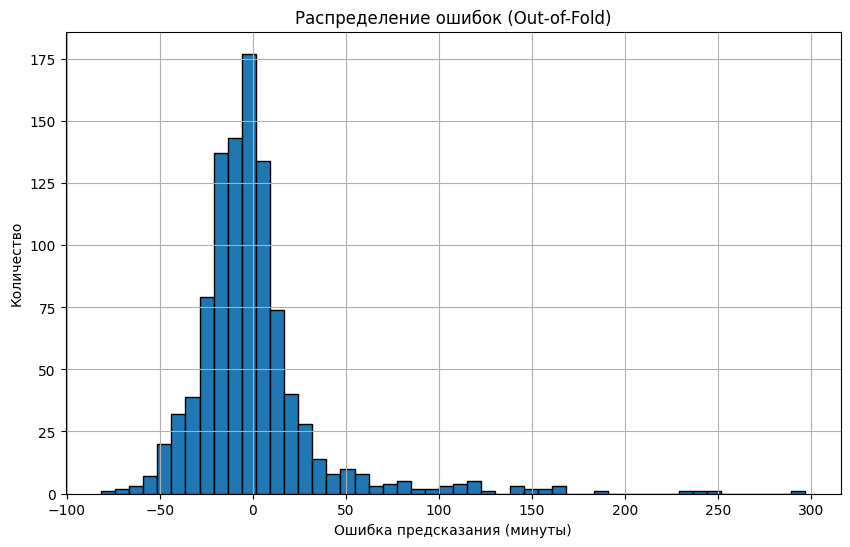

In [ ]:
from sklearn.model_selection import cross_val_predict

# Out-of-Fold предсказания
oof_predictions = cross_val_predict(Ridge(), X_train[:1000], y_train[:1000], cv=5)

# Ошибки
oof_errors = y_train[:1000] - oof_predictions

# График распределения ошибок
plt.figure(figsize=(10, 6))
plt.hist(oof_errors, bins=50, edgecolor='black')
plt.xlabel('Ошибка предсказания (минуты)')
plt.ylabel('Количество')
plt.title('Распределение ошибок (Out-of-Fold)')
plt.grid(True)
plt.show()

На графике изображено распределение ошибок предсказания модели Ridge регрессии.

Что конкретно показано:

По оси X: величина ошибки предсказания в минутах

Отрицательные значения: модель переоценила задержку (предсказала больше, чем было на самом деле)
Положительные значения: модель недооценила задержку (предсказала меньше, чем было)
Ноль: идеальное предсказание
По оси Y: количество рейсов с данной ошибкой

Что можно увидеть на таком графике:

Центр распределения - где сосредоточены большинство ошибок
Ширину распределения - насколько ошибки разбросаны
Выбросы - объекты с очень большими ошибками (далекие от центра)
Симметричность - одинаково ли модель ошибается в обе стороны
Примеры интерпретации:

Если пик около 0 - много точных предсказаний
Если длинные "хвосты" - есть выбросы с огромными ошибками
Если смещение от 0 - систематическая ошибка модели
Если широкое распределение - модель неустойчива

In [ ]:
# Анализ выбросов
print("Анализ ошибок:")
print(f"Средняя ошибка: {oof_errors.mean():.1f}")
print(f"Стандартное отклонение: {oof_errors.std():.1f}")
print(f"Максимальная ошибка: {oof_errors.max():.1f}")
print(f"Минимальная ошибка: {oof_errors.min():.1f}")

# Выбросы (ошибки > 3 стандартных отклонений)
outliers = np.abs(oof_errors) > 3 * oof_errors.std()
print(f"Количество выбросов: {outliers.sum()}")

Анализ ошибок:
Средняя ошибка: 0.3
Стандартное отклонение: 35.0
Максимальная ошибка: 296.8
Минимальная ошибка: -81.5
Количество выбросов: 25
